In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dt = pd.read_csv("heart.csv")
dt.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [24]:
dt.shape # shows rows and columns

(1025, 14)

In [25]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [26]:
dt['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

# Class Distribution

The dataset contains:
526 patients with heart disease (target = 1)  
499 patients without heart disease (target = 0)

The dataset is relatively balanced because both classes have similar numbers of observations.

This is a supervised learning problem because we are given labeled data (features and known outcomes).

This is a classification problem because the target variable is categorical (0 or 1), not continuous.


In [27]:
dt.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [28]:
dt.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

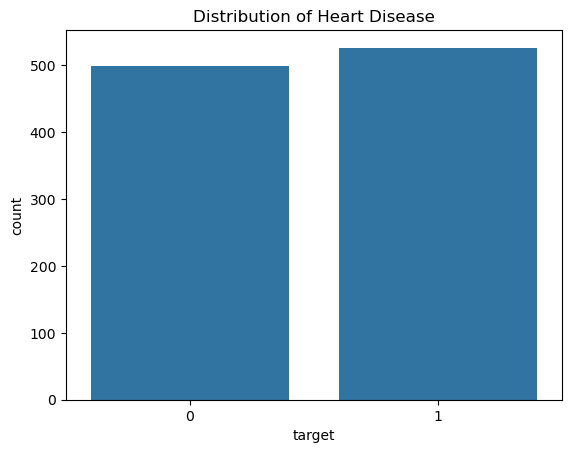

In [29]:


sns.countplot(x="target", data=dt)
plt.title("Distribution of Heart Disease")
plt.show()


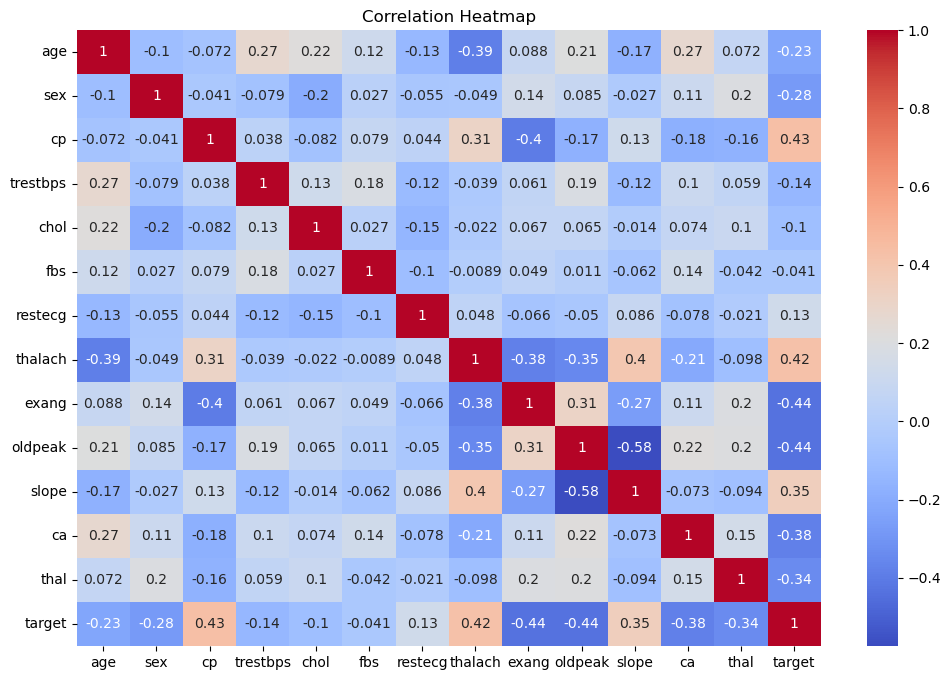

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(dt.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


strong correlations with target = cp,thalach

weak correlatons with target = exang, oldpeak

# Correlation Analysis

From the heatmap, the features most positively correlated with heart disease (target) are:

- cp (chest pain type) with correlation ≈ 0.43
- thalach (maximum heart rate) with correlation ≈ 0.42

The features most negatively correlated with heart disease are:

- exang (exercise induced angina) with correlation ≈ -0.44
- oldpeak (ST depression) with correlation ≈ -0.44

This suggests that chest pain type and maximum heart rate strongly increase the likelihood of heart disease, while exercise-induced angina and ST depression are also important indicators.


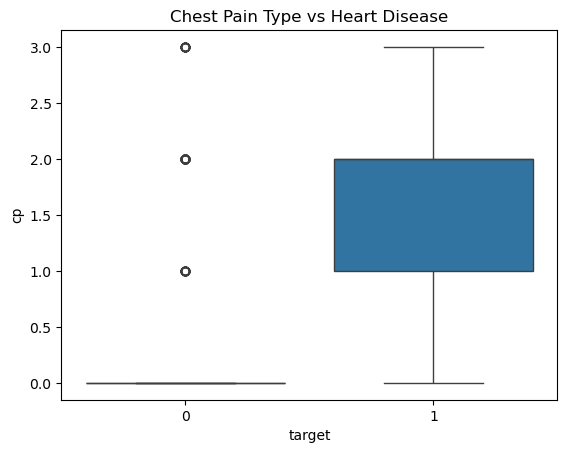

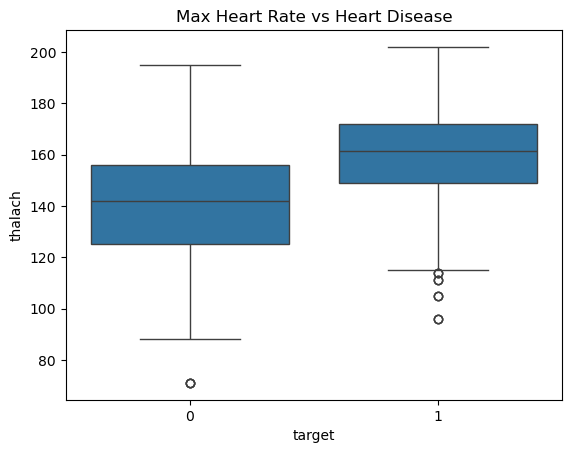

In [31]:
sns.boxplot(x="target", y="cp", data=dt)
plt.title("Chest Pain Type vs Heart Disease")
plt.show()

sns.boxplot(x="target", y="thalach", data=dt)
plt.title("Max Heart Rate vs Heart Disease")
plt.show()


# Boxplot Analysis

From the boxplots, we observe clear differences between patients with and without heart disease.

For thalach (maximum heart rate):
Patients with heart disease tend to have a higher maximum heart rate compared to those without heart disease. The median values are clearly different, indicating this feature is useful for classification.

For cp (chest pain type):
Patients without heart disease mostly have cp = 0, while patients with heart disease have higher chest pain type values. This shows strong separation between the two classes.

These differences suggest that both thalach and cp are important predictors of heart disease.


# Data Preparation & Model Training

In [32]:

x = dt.drop("target", axis=1)
y = dt["target"]


In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [35]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [36]:
coefficients = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": log_model.coef_[0]
})

coefficients.sort_values(by="Coefficient", ascending=False)


,Feature,Coefficient
2,cp,0.867769
7,thalach,0.411778
10,slope,0.365533
6,restecg,0.163175
5,fbs,-0.016271
0,age,-0.116839
4,chol,-0.275126
3,trestbps,-0.362392
12,thal,-0.499174
8,exang,-0.517055


# Logistic Regression Coefficient Interpretation

The feature with the largest positive coefficient is:

- cp (chest pain type) ≈ 0.868

This means that higher chest pain type values significantly increase the probability of having heart disease.

The feature with the largest negative coefficient is:

- exang (exercise-induced angina) ≈ -0.517

This means that this feature strongly influences the prediction in the opposite direction. Since logistic regression works with log-odds, positive coefficients increase the probability of class 1 (heart disease), while negative coefficients decrease it.

Overall, chest pain type appears to be the most important predictor of heart disease in this model.


# Why Logistic Regression Uses the Sigmoid Function

The sigmoid function converts any real number into a value between 0 and 1.

Logistic regression uses the sigmoid function to transform the linear combination of features into a probability.

This probability represents the likelihood that a patient has heart disease.

Unlike linear regression, logistic regression does not predict raw numbers. Instead, it predicts probabilities, which are then classified into 0 or 1 using a threshold (usually 0.5).


In [37]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = log_model.predict(x_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix


array([[70, 30],
       [ 9, 96]])

# Confusion Matrix Interpretation

True Positive (96):
Patients who have heart disease and were correctly predicted as having heart disease.

True Negative (70):
Patients who do not have heart disease and were correctly predicted as healthy.

False Positive (30):
Patients who do NOT have heart disease but were predicted as having heart disease.

False Negative (9):
Patients who HAVE heart disease but were predicted as healthy.


# Manual Metric Calculations

From the confusion matrix:

True Negative (TN) = 70  
False Positive (FP) = 30  
False Negative (FN) = 9  
True Positive (TP) = 96  

Total = 205

Accuracy = (TP + TN) / Total  
= (96 + 70) / 205  
= 166 / 205  
= 0.81 (81%)

Precision = TP / (TP + FP)  
= 96 / (96 + 30)  
= 96 / 126  
= 0.76 (76%)

Recall = TP / (TP + FN)  
= 96 / (96 + 9)  
= 96 / 105  
= 0.91 (91%)

F1 Score = 2 × (Precision × Recall) / (Precision + Recall)  
= 2 × (0.76 × 0.91) / (0.76 + 0.91)  
= 0.83 (83%)


# Confusion Matrix Interpretation & Evaluation

i) What does each cell of the confusion matrix mean?

True Positive (TP):
A patient HAS heart disease and the model correctly predicted that they have heart disease.

True Negative (TN):
A patient does NOT have heart disease and the model correctly predicted that they are healthy.

False Positive (FP):
A patient does NOT have heart disease but the model predicted that they have heart disease.
(This may cause unnecessary stress or additional medical tests.)

False Negative (FN):
A patient HAS heart disease but the model predicted that they are healthy.
(This is dangerous because the patient may not receive needed treatment.)

---

ii) Which is worse: False Positive or False Negative?

For a disease detection model, a False Negative is worse.

A False Negative means a sick patient is classified as healthy. This could delay diagnosis and treatment, potentially leading to serious health complications or even death.

---

iii) Should we optimize for Precision or Recall?

We should optimize for Recall.

Recall measures how many actual heart disease cases we correctly identify.
Since missing a sick patient (False Negative) is very dangerous, we want Recall to be as high as possible to ensure we detect most patients who truly have heart disease.

---

iv) If accuracy is 85% but recall is only 50%, is this a good model?

No, this is NOT a good model for detecting heart disease.

Even though 85% accuracy sounds good, a recall of 50% means the model is missing half of the patients who actually have heart disease.

In medical diagnosis, missing sick patients is unacceptable. Therefore, high recall is more important than high accuracy.

